In [1]:
# ==== Mount Google Drive ====
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 安装依赖
!pip install -q "flwr[simulation]" torch torchvision


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [2]:
# Federated+clusrer 30min → 30min

# ----  Set Project Root Directory ----
import os, sys
project_root = "/content/drive/MyDrive/elec_forecasting"
os.chdir(project_root)
sys.path.append(project_root)

# ---- Import modules ----
from utils.visualization import (
    save_sorted_r2_plot,
    save_sorted_mae_plot,
    save_sorted_rmse_plot,
    plot_federated_vs_clustered
)


In [ ]:
# Step 1: 执行聚类脚本
!python cluster/cluster_households.py


In [ ]:
import json
with open("cluster/cluster_result.json", "r") as f:
    cluster_map = json.load(f)

for k, v in cluster_map.items():
    print(f"{k}: {v}")


cluster_1: ['H10_Wh', 'H11_Wh', 'H18_Wh', 'H1_Wh', 'H20_Wh', 'H4_Wh', 'H5_Wh', 'H7_Wh', 'H9_Wh']
cluster_2: ['H12_Wh', 'H13_Wh', 'H16_Wh', 'H17_Wh', 'H19_Wh']
cluster_0: ['H14_Wh', 'H15_Wh', 'H2_Wh', 'H3_Wh', 'H6_Wh', 'H8_Wh']


In [ ]:
# Step 2: 训练带聚类的联邦模型
!python cluster/run_clustered_fl.py


流式输出内容被截断，只能显示最后 5000 行内容。
(ClientAppActor pid=29839) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=29839)             This is a deprecated feature. It will be removed
(ClientAppActor pid=29839)             entirely in future versions of Flower.
(ClientAppActor pid=29837) [H1] round= 9  R²=0.872  MAE=90.3 [repeated 2x across cluster]
(ClientAppActor pid=29839) Loading cached dataset from: data/cached/dataset_w6_h6_sum_normX_resample5min_clustered.pkl
(ClientAppActor pid=29837) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=29837) 
(ClientAppActor pi

In [ ]:
# Step 2: 保存最优轮次指标
!python cluster/generate_all_eval_metrics_best.py


🔬 Processing cluster_0
[cluster_0] ✅ Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min/cluster_0/eval_metrics_best.csv

🔬 Processing cluster_1
[cluster_1] ✅ Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min/cluster_1/eval_metrics_best.csv

🔬 Processing cluster_2
[cluster_2] ✅ Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min/cluster_2/eval_metrics_best.csv


In [ ]:
!python cluster/postprocess_all_clusters.py

2025-08-17 18:09:12.632165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755454152.675305    7611 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755454152.688196    7611 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755454152.723582    7611 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755454152.723679    7611 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755454152.723689    7611 computation_placer.cc:177] computation placer alr

In [ ]:
!python cluster/merge_all_eval_best.py

✅ Appended GLOBAL-ALL from global_all_metrics.csv
✅ Merged successfully: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min/merged_eval_metrics_best.csv


R² comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/r2_sorted_plot.png


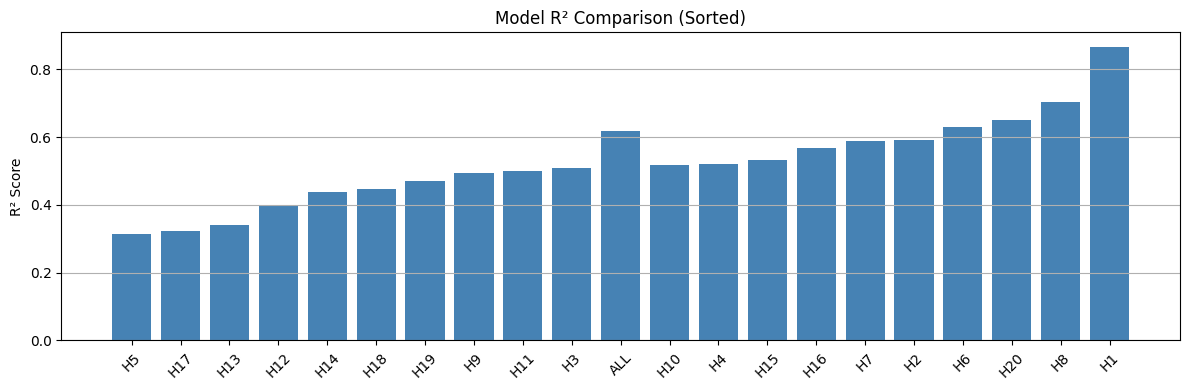

MAE comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/mae_sorted_plot.png


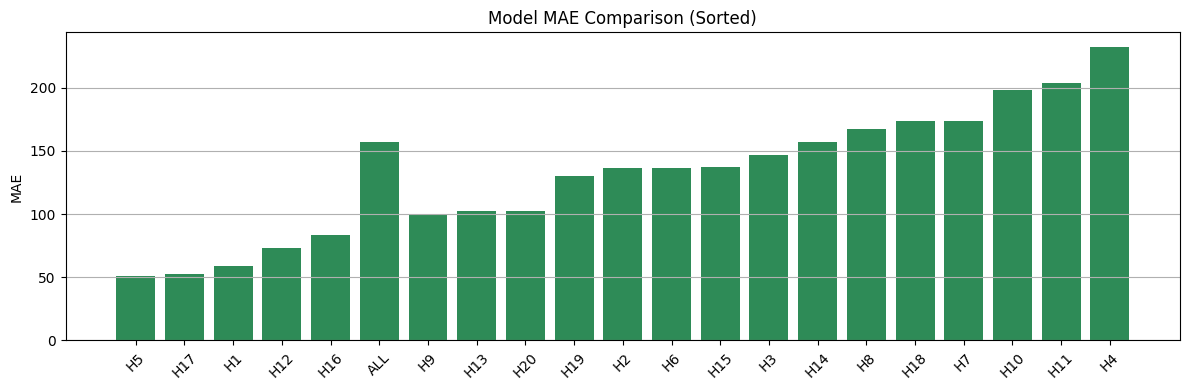

In [ ]:
project_root = "/content/drive/MyDrive/elec_forecasting"
eval_csv_path = os.path.join(project_root, "experiments", "clustered_fl", "30min_30min", "merged_eval_metrics_best.csv")
plot_dir = os.path.join(project_root, "experiments", "clustered_fl", "30min_30min", "merged_plots")
os.makedirs(plot_dir, exist_ok=True)

save_sorted_r2_plot(eval_csv_path, save_path=os.path.join(plot_dir, "r2_sorted_plot.png"))
save_sorted_mae_plot(eval_csv_path, save_path=os.path.join(plot_dir, "mae_sorted_plot.png"))


/content/drive/MyDrive/elec_forecasting/utils/visualization.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: /content/drive/MyDrive/elec_forecasting/comparison_plots_cluster/30min_30min/r2_comparison.png


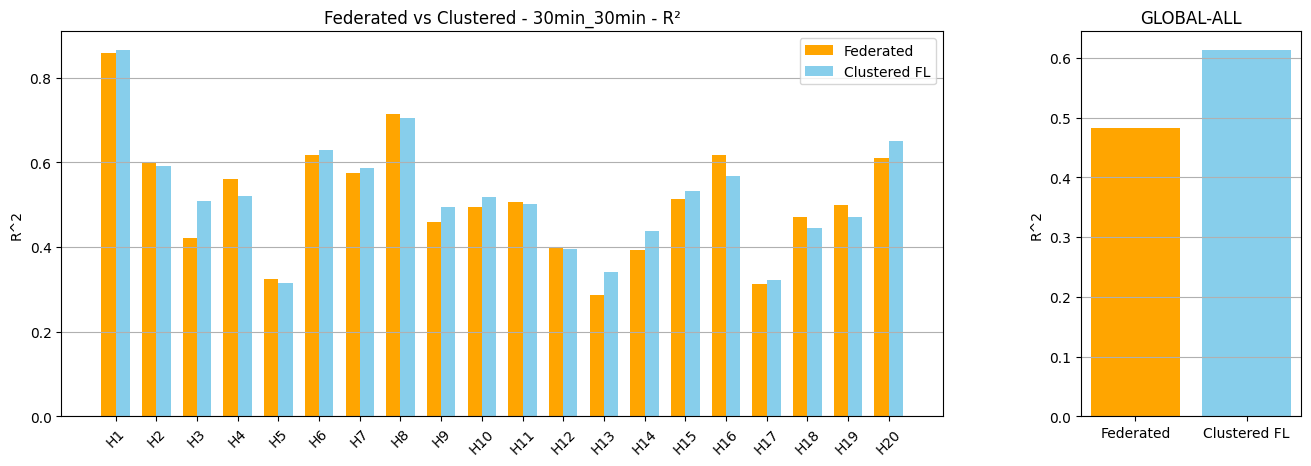

/content/drive/MyDrive/elec_forecasting/utils/visualization.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: /content/drive/MyDrive/elec_forecasting/comparison_plots_cluster/30min_30min/mae_comparison.png


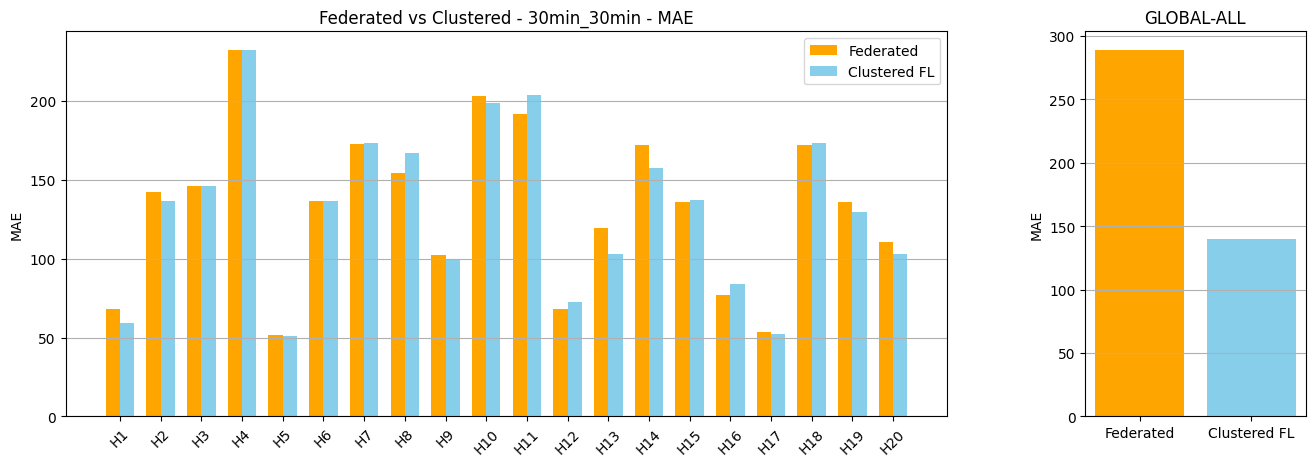

/content/drive/MyDrive/elec_forecasting/utils/visualization.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: /content/drive/MyDrive/elec_forecasting/comparison_plots_cluster/30min_30min/rmse_comparison.png


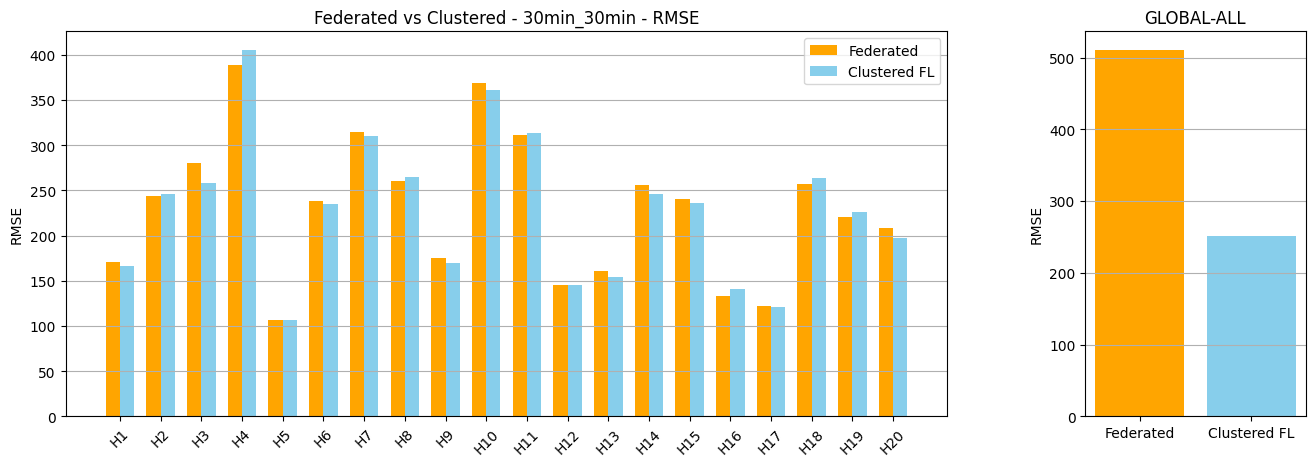

Federated vs Clustered 对比图已保存至: /content/drive/MyDrive/elec_forecasting/comparison_plots_cluster/30min_30min


In [3]:
# ==== Set CSV Paths ====
config_name = "30min_30min"
fed_path = os.path.join(project_root, "experiments", "federated_lstm", config_name, "eval_metrics_best.csv")
cluster_path = os.path.join(project_root, "experiments", "clustered_fl", config_name, "merged_eval_metrics_best.csv")

# ==== 设置保存路径 ====
save_dir = os.path.join(project_root, "comparison_plots_cluster", config_name)
os.makedirs(save_dir, exist_ok=True)

# ==== 画图并保存 ====
plot_federated_vs_clustered(
    fed_path, cluster_path,
    metric="R^2",
    title=f"Federated vs Clustered - {config_name} - R²",
    save_path=os.path.join(save_dir, "r2_comparison.png")
)

plot_federated_vs_clustered(
    fed_path, cluster_path,
    metric="MAE",
    title=f"Federated vs Clustered - {config_name} - MAE",
    save_path=os.path.join(save_dir, "mae_comparison.png")
)

plot_federated_vs_clustered(
    fed_path, cluster_path,
    metric="RMSE",
    title=f"Federated vs Clustered - {config_name} - RMSE",
    save_path=os.path.join(save_dir, "rmse_comparison.png")
)

print(f"Federated vs Clustered 对比图已保存至: {save_dir}")

